<a href="https://colab.research.google.com/github/pontusj101/attack_graph_value_iteration/blob/main/attack_graph_value_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def value_iteration(m, gamma=0.9, effort=10, tolerance=1e-3):
  n = m.shape[0]
  V = np.zeros(n)
  Q = np.zeros((n, n))
  error = tolerance + 1
  # Did the attacker's effort exceed the time to compromise?
  succ = np.where(m > -effort, 1, 0)
  while error > tolerance:
    Q = (m + gamma * V) * succ
    new_V = np.max(Q, axis=1)
    error = np.max(np.abs(V - new_V))
    V = np.copy(new_V)
  return V,Q

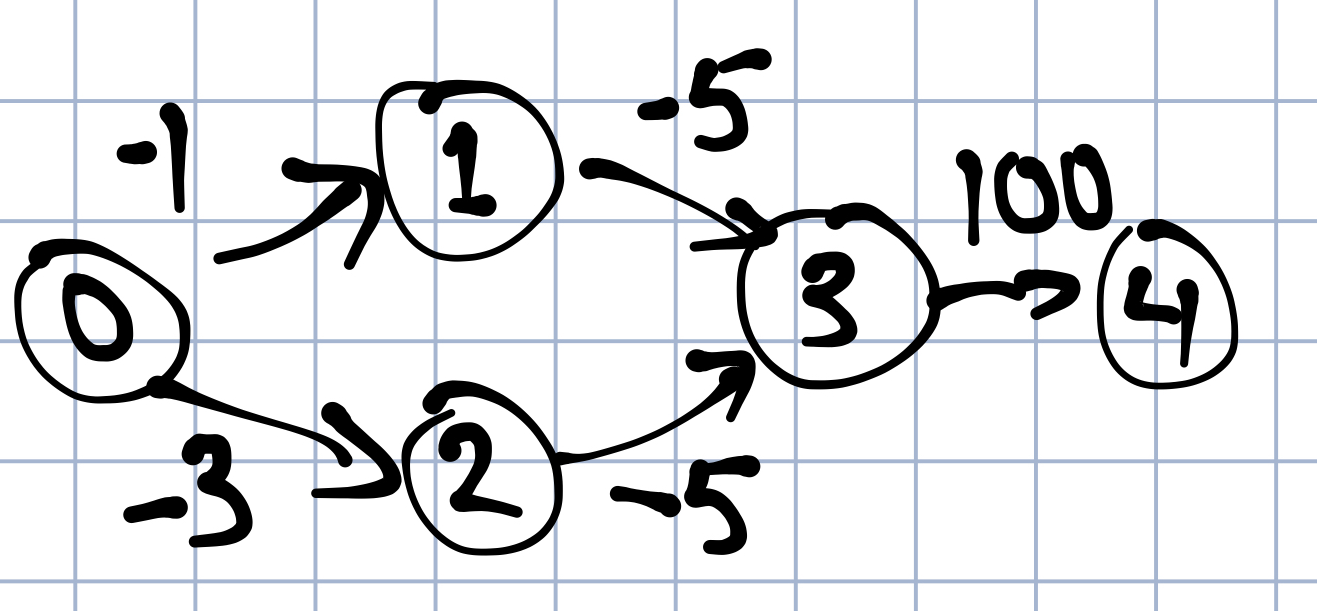

In [3]:
# number of attack steps
n = 5
# adjacency matrix with rewards
# impossible transitions have a time to compromise (negative reward) of 999
m = np.ones((n, n)) * -999
m[0, 1] = -1
m[0, 2] = -3
m[1, 3] = -5
m[2, 3] = -5
m[3, 4] = 100

V,Q = value_iteration(m)
print(V)

[ 75.5  85.   85.  100.   -0. ]


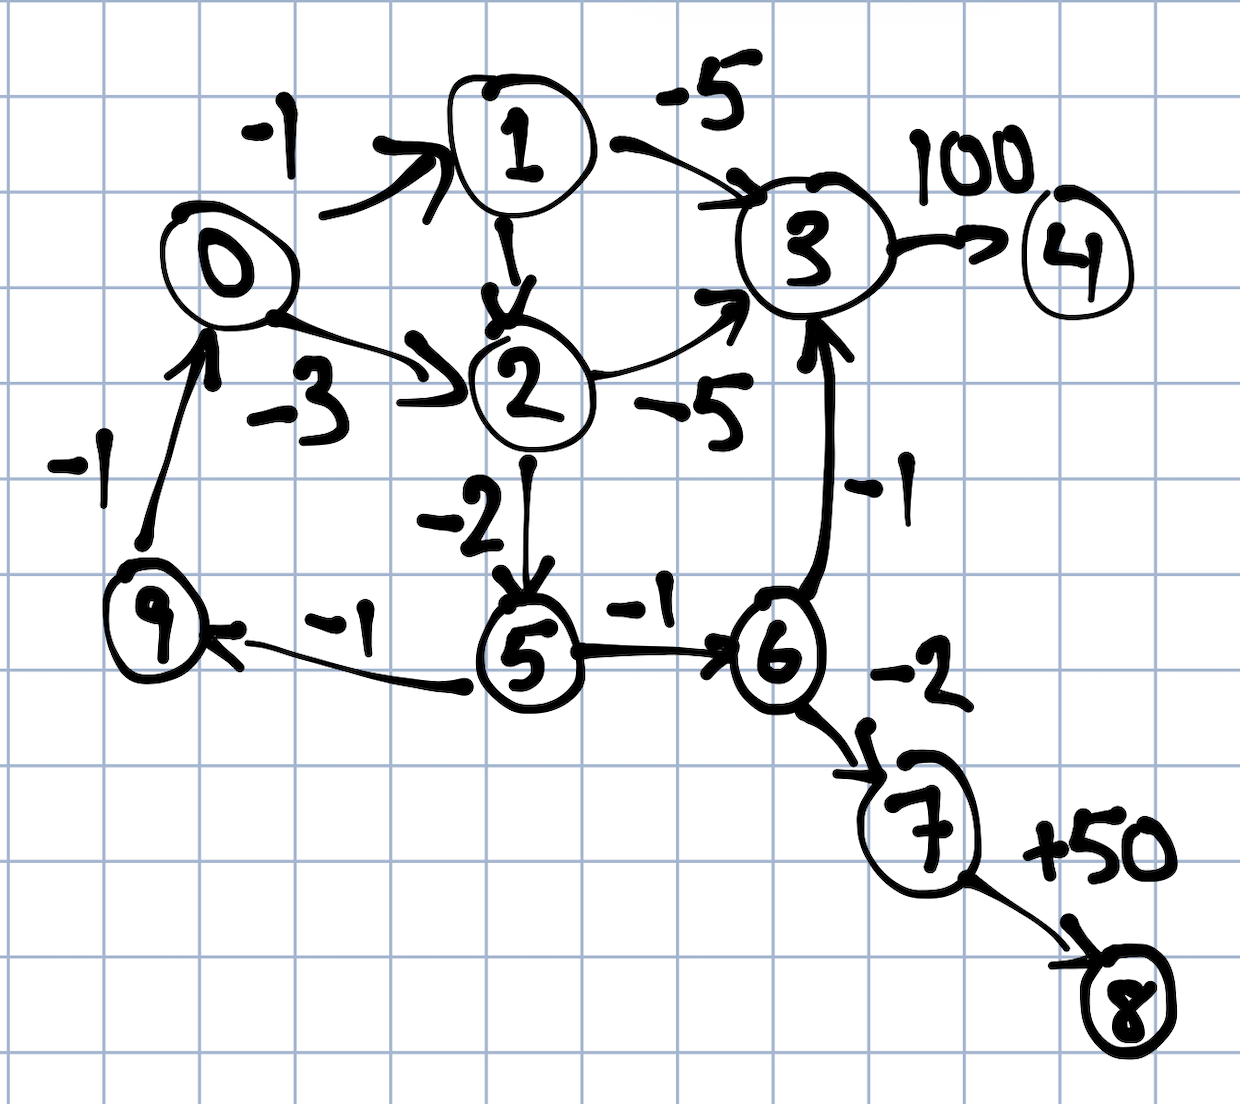

In [4]:
# number of attack steps
n = 10
# adjacency matrix with rewards
# impossible transitions have a time to compromise (negative reward) of 999
m = np.ones((n, n)) * -999
m[0, 1] = -1
m[0, 2] = -3
m[1, 2] = -7
m[1, 3] = -5
m[2, 3] = -5
m[2, 5] = -2
m[3, 4] = 100
m[5, 6] = -1
m[5, 9] = -1
m[6, 3] = -1
m[6, 7] = -2
m[7, 8] = 50
m[9, 0] = -1

V,Q = value_iteration(m)
print(V)

[ 75.5   85.    85.   100.    -0.    79.1   89.    50.    -0.    66.95]
